In [2]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
%pwd
%cd ..

/Users/ENZO/KOOKIZ/GITHUB/handsign


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
actions = ["답답하다", "땀난다", "부었다", "불편하다",
           "아프다", "어지럽다", "열난다", "지속된다", "피곤하다"]
time_num, time_num1, time_num2 = '1746600062', '1746600196', '1746600331'

for time_num in [time_num, time_num1, time_num2]:
    data = np.concatenate([
        np.load(f'dataset/seq_아프다_{time_num}.npy'),
        np.load(f'dataset/seq_열난다_{time_num}.npy'),
        np.load(f'dataset/seq_답답하다_{time_num}.npy'),
        np.load(f'dataset/seq_땀난다_{time_num}.npy'),
        np.load(f'dataset/seq_부었다_{time_num}.npy'),
        np.load(f'dataset/seq_불편하다_{time_num}.npy'),
        np.load(f'dataset/seq_어지럽다_{time_num}.npy'),
        np.load(f'dataset/seq_지속된다_{time_num}.npy'),
        np.load(f'dataset/seq_피곤하다_{time_num}.npy')
    ], axis=0)

data.shape

(412, 10, 56)

In [5]:
# print(np.load(f'dataset/seq_아프다_1744773358.npy').shape)
# print(np.load(f'dataset/seq_열_1744773358.npy').shape)
# print(np.load(f'dataset/seq_기침_1744773358.npy').shape)
# print(np.load(f'dataset/seq_콧물_1744773358.npy').shape)
# print(np.load(f'dataset/seq_코막힘_1744773358.npy').shape)
# print(np.load(f'dataset/seq_머리_1744773358.npy').shape)
# print(np.load(f'dataset/seq_배_1744773358.npy').shape)
# print(np.load(f'dataset/seq_설사_1744773358.npy').shape)
# print(np.load(f'dataset/seq_변비_1744773358.npy').shape)
# print(np.load(f'dataset/seq_구토_1744773358.npy').shape)

In [6]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(412, 10, 55)
(412,)


In [7]:
labels

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [8]:
len(labels)

412

In [9]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [10]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(412, 9)

In [11]:
y_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2020)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(329, 10, 55) (329, 9)
(83, 10, 55) (83, 9)


In [13]:
x_train.shape[1:3]

(10, 55)

In [14]:
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [15]:
# custom f1 score
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(len(actions), activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01))
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',metric_F1score])
model.summary()

/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        30,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,097 (129.29 KB)

 Trainable params: 33,097 (129.29 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_metric_F1score', min_delta = 0, patience = 20, mode = 'max')


history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=500,
    callbacks=[
        ModelCheckpoint('models/multi_hand_gesture_classifier.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_metric_F1score', factor=0.5, patience=50, verbose=1, mode='auto'),
        early_stopping
    ]
)

Epoch 1/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 7s 773ms/step - acc: 0.0000e+00 - loss: 98.6419 - metric_f1score: nan
Epoch 1: val_acc improved from -inf to 0.09639, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.0486 - loss: 55.0353 - metric_f1score: nan - val_acc: 0.0964 - val_loss: 15.9270 - val_metric_f1score: nan - learning_rate: 0.0010
Epoch 2/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2188 - loss: 40.2578 - metric_f1score: 0.2105
Epoch 2: val_acc improved from 0.09639 to 0.30120, saving model to models/multi_hand_gesture_classifier.h5


/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate.
  callback.on_epoch_end(epoch, logs)
/opt/anaconda3/envs/hi/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_metric_F1score` which is not available. Available metrics are: acc,loss,metric_f1score,val_acc,val_loss,val_metric_f1score,learning_rate
  current = self.get_monitor_value(logs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1642 - loss: 26.1146 - metric_f1score: nan - val_acc: 0.3012 - val_loss: 10.4348 - val_metric_f1score: 0.2116 - learning_rate: 0.0010
Epoch 3/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.1250 - loss: 35.3240 - metric_f1score: 0.1311
Epoch 3: val_acc improved from 0.30120 to 0.39759, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1704 - loss: 22.9492 - metric_f1score: 0.1610 - val_acc: 0.3976 - val_loss: 8.3936 - val_metric_f1score: 0.4313 - learning_rate: 0.0010
Epoch 4/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.1562 - loss: 25.7936 - metric_f1score: 0.1311
Epoch 4: val_acc improved from 0.39759 to 0.69880, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2629 - loss: 17.2037 - metric_f1score: 0.2375 - val_acc: 0.6988 - val_loss: 5.5954 - val_metric_f1score: 0.7222 - learning_rate: 0.0010
Epoch 5/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2812 - loss: 16.5308 - metric_f1score: 0.2667
Epoch 5: val_acc improved from 0.69880 to 0.75904, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3573 - loss: 11.8130 - metric_f1score: 0.3498 - val_acc: 0.7590 - val_loss: 6.3231 - val_metric_f1score: 0.7874 - learning_rate: 0.0010
Epoch 6/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3750 - loss: 14.2552 - metric_f1score: 0.3729
Epoch 6: val_acc improved from 0.75904 to 0.83133, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4335 - loss: 9.6227 - metric_f1score: 0.4312 - val_acc: 0.8313 - val_loss: 3.1607 - val_metric_f1score: 0.8493 - learning_rate: 0.0010
Epoch 7/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4062 - loss: 14.6992 - metric_f1score: 0.4333
Epoch 7: val_acc improved from 0.83133 to 0.86747, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4301 - loss: 9.7973 - metric_f1score: 0.4296 - val_acc: 0.8675 - val_loss: 1.7962 - val_metric_f1score: 0.9057 - learning_rate: 0.0010
Epoch 8/500
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5898 - loss: 4.9931 - metric_f1score: 0.6009 
Epoch 8: val_acc improved from 0.86747 to 0.89157, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5878 - loss: 5.0334 - metric_f1score: 0.5987 - val_acc: 0.8916 - val_loss: 1.4766 - val_metric_f1score: 0.9227 - learning_rate: 0.0010
Epoch 9/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7188 - loss: 4.3181 - metric_f1score: 0.7213
Epoch 9: val_acc did not improve from 0.89157
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5919 - loss: 4.7276 - metric_f1score: 0.6095 - val_acc: 0.8916 - val_loss: 1.4079 - val_metric_f1score: 0.9232 - learning_rate: 0.0010
Epoch 10/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6250 - loss: 5.1477 - metric_f1score: 0.5763
Epoch 10: val_acc improved from 0.89157 to 0.92771, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5964 - loss: 4.3079 - metric_f1score: 0.5819 - val_acc: 0.9277 - val_loss: 1.2709 - val_metric_f1score: 0.9349 - learning_rate: 0.0010
Epoch 11/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.5938 - loss: 4.6229 - metric_f1score: 0.6207
Epoch 11: val_acc did not improve from 0.92771
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6606 - loss: 3.8637 - metric_f1score: 0.6674 - val_acc: 0.9277 - val_loss: 1.2306 - val_metric_f1score: 0.9349 - learning_rate: 0.0010
Epoch 12/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.6250 - loss: 4.5669 - metric_f1score: 0.6000
Epoch 12: val_acc improved from 0.92771 to 0.96386, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.6472 - loss: 3.8080 - metric_f1score: 0.6432 - val_acc: 0.9639 - val_loss: 1.1833 - val_metric_f1score: 0.9462 - learning_rate: 0.0010
Epoch 13/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7188 - loss: 3.9537 - metric_f1score: 0.7213
Epoch 13: val_acc improved from 0.96386 to 0.97590, saving model to models/multi_hand_gesture_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7271 - loss: 2.9187 - metric_f1score: 0.7403 - val_acc: 0.9759 - val_loss: 1.0562 - val_metric_f1score: 0.9841 - learning_rate: 0.0010
Epoch 14/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.7812 - loss: 3.4516 - metric_f1score: 0.7742
Epoch 14: val_acc did not improve from 0.97590
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7442 - loss: 3.1113 - metric_f1score: 0.7371 - val_acc: 0.9759 - val_loss: 1.0086 - val_metric_f1score: 0.9841 - learning_rate: 0.0010
Epoch 15/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8125 - loss: 3.8963 - metric_f1score: 0.8254
Epoch 15: val_acc did not improve from 0.97590
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7793 - loss: 2.8612 - metric_f1score: 0.7852 - val_acc: 0.9759 - val_loss: 0.9966 - val_metric_f1score: 0.9792 - learning_rate: 0.0010
Epoch 16/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.7188 - loss: 3.8098 - metric_f1score: 0.7302
Epoch 16: val_acc did not improve fr

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7979 - loss: 2.6723 - metric_f1score: 0.8139 - val_acc: 1.0000 - val_loss: 0.9465 - val_metric_f1score: 1.0000 - learning_rate: 0.0010
Epoch 18/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8125 - loss: 1.5808 - metric_f1score: 0.8197
Epoch 18: val_acc did not improve from 1.00000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7859 - loss: 2.0556 - metric_f1score: 0.8010 - val_acc: 0.9880 - val_loss: 0.9644 - val_metric_f1score: 0.9910 - learning_rate: 0.0010
Epoch 19/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.7812 - loss: 2.9946 - metric_f1score: 0.7812
Epoch 19: val_acc did not improve from 1.00000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.7944 - loss: 2.3069 - metric_f1score: 0.7937 - val_acc: 0.9759 - val_loss: 0.9754 - val_metric_f1score: 0.9806 - learning_rate: 0.0010
Epoch 20/500
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.8438 - loss: 1.4977 - metric_f1score: 0.8387
Epoch 20: val_acc did not improve fr

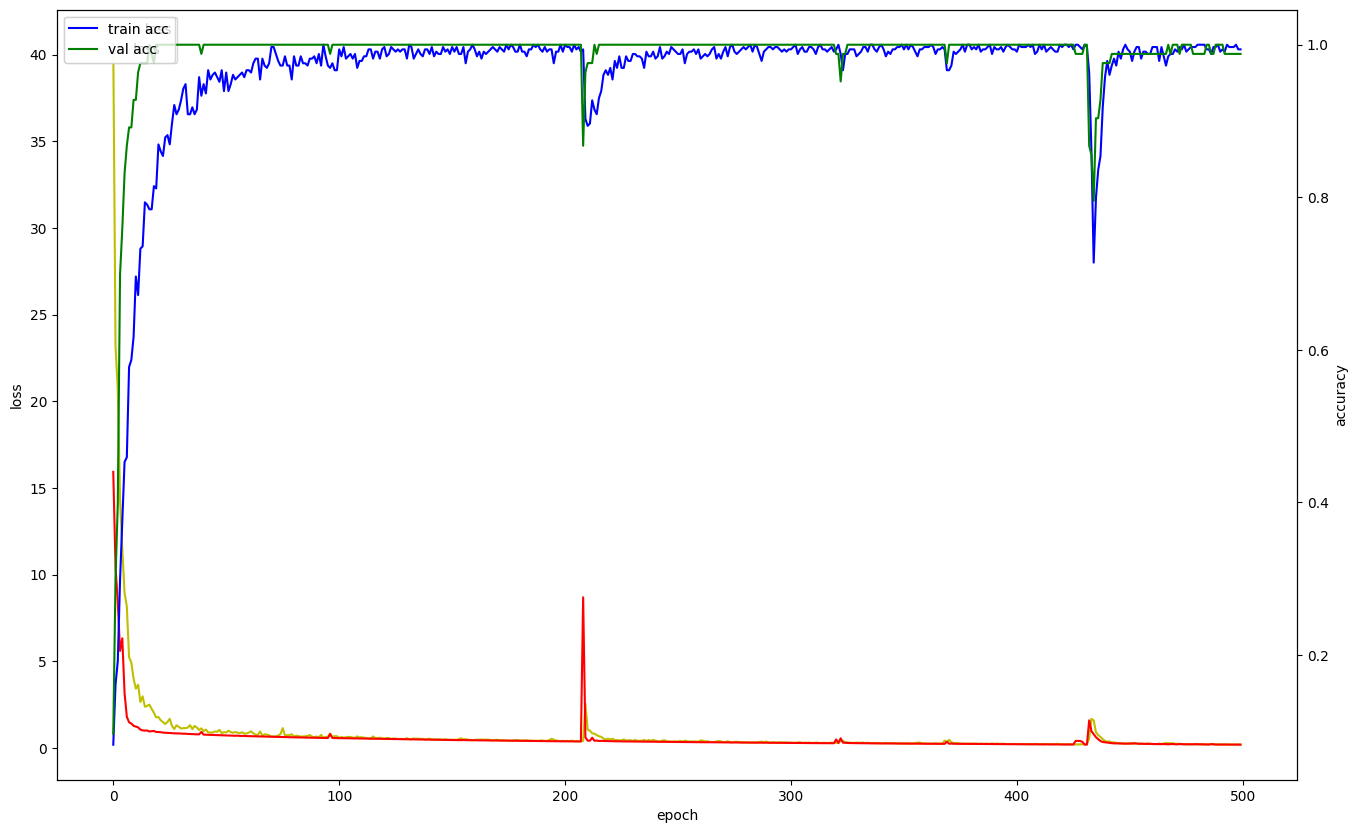

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

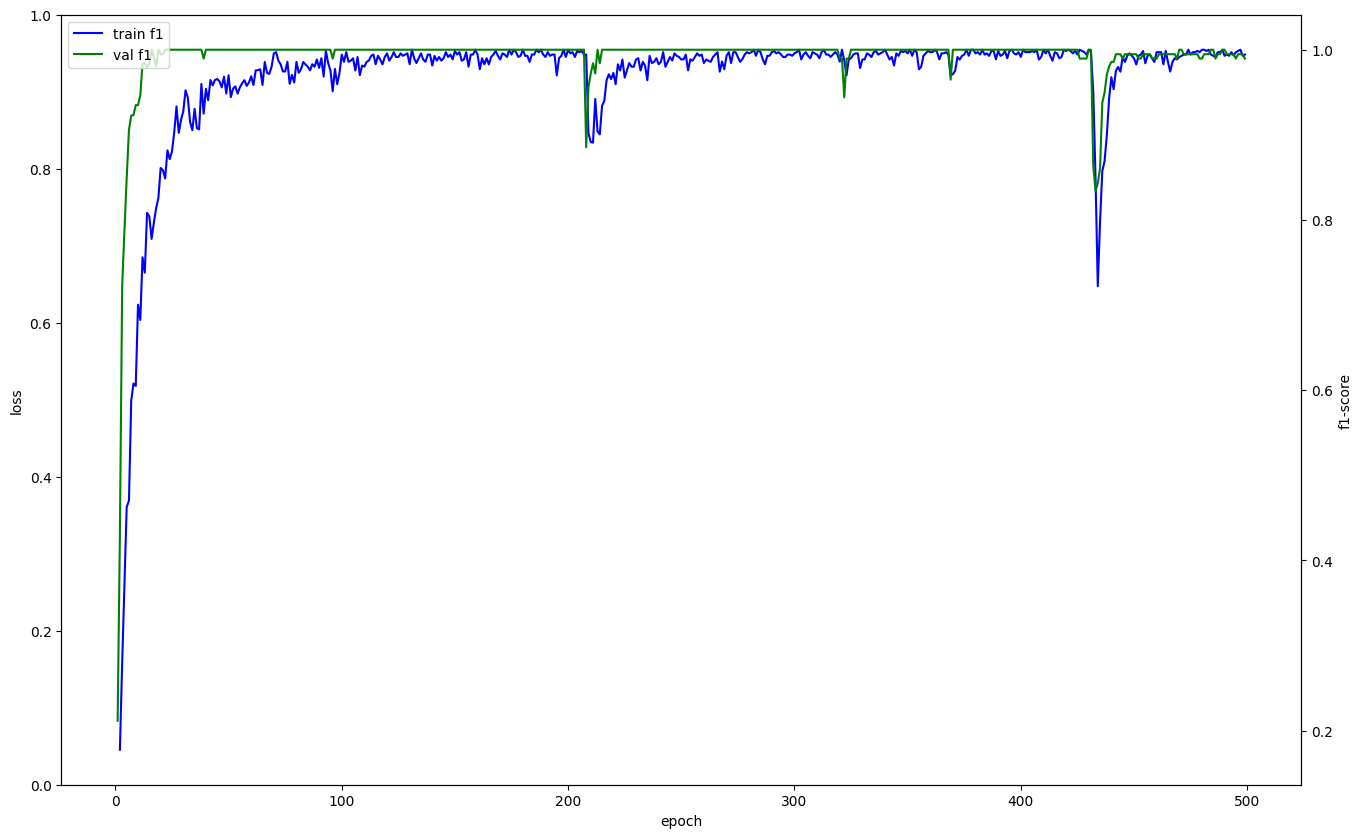

In [19]:
fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.plot(history.history['metric_f1score'], 'b', label='train f1')
acc_ax.plot(history.history['val_metric_f1score'], 'g', label='val f1')
acc_ax.set_ylabel('f1-score')
acc_ax.legend(loc='upper left')

plt.show()

In [20]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5', custom_objects = {'metric_F1score':metric_F1score})

y_pred = model.predict(x_val)
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[[75,  0],
        [ 0,  8]],

       [[77,  0],
        [ 0,  6]],

       [[76,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0,  5]],

       [[76,  0],
        [ 0,  7]],

       [[61,  0],
        [ 0, 22]],

       [[71,  0],
        [ 0, 12]],

       [[75,  0],
        [ 0,  8]],

       [[75,  0],
        [ 0,  8]]])

In [21]:
multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[75,  0],
        [ 0,  8]],

       [[77,  0],
        [ 0,  6]],

       [[76,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0,  5]],

       [[76,  0],
        [ 0,  7]],

       [[61,  0],
        [ 0, 22]],

       [[71,  0],
        [ 0, 12]],

       [[75,  0],
        [ 0,  8]],

       [[75,  0],
        [ 0,  8]]])

In [22]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/multi_hand_gesture_classifier.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[[75,  0],
        [ 0,  8]],

       [[77,  0],
        [ 0,  6]],

       [[76,  0],
        [ 0,  7]],

       [[78,  0],
        [ 0,  5]],

       [[76,  0],
        [ 0,  7]],

       [[61,  0],
        [ 0, 22]],

       [[71,  0],
        [ 0, 12]],

       [[75,  0],
        [ 0,  8]],

       [[75,  0],
        [ 0,  8]]])

In [23]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 1. TF Lite 기본 연산 + Select TF ops 사용
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]

# 2. TensorList lowering 비활성화
converter._experimental_lower_tensor_list_ops = False

# 변환 실행
tflite_model = converter.convert()

# 모델 저장
with open('models/multi_hand_gesture_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp72oc7g1b/assets


INFO:tensorflow:Assets written to: /var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp72oc7g1b/assets


Saved artifact at '/var/folders/_k/9pcm610n0sb_j9n64tc8zgcw0000gn/T/tmp72oc7g1b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 55), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  13458635440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13387395872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13459166256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13459175936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13459230208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13459239008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13459237072: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746600622.405254 8280577 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746600622.405540 8280577 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1746600622.411071 8280577 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-05-07 15:50:22.583835: W tensorflow/compiler/mlir/lite/flatbuffer_export.cc:3993] TFLite interpreter needs to link Flex delegate in order to run the model since it contains the following Select TFop(s):
Flex ops: FlexTensorListReserve, FlexTensorListSetItem, FlexTensorListStack
Details:
	tf.TensorListReserve(tensor<2xi32>, tensor<i32>) -> (tensor<!tf_type.variant<tensor<?x64xf32>>>) : {device = ""}
	tf.TensorListSetItem(tensor<!tf_type.variant<tensor<?x64xf32>>>, tensor<i32>, tensor<?x64xf32>) -> (tensor<!tf_type.variant<tensor<?x64xf32>>>) : {device = "", resize_if_index_out_of_bounds = false}
	tf.TensorListStack(tensor<!tf_type.variant<tensor<?x64xf32>>>, tensor<2xi32>